In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

The PIL library is used to open image content into an array.

In [20]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'TrafficSign/Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(os.path.join(path, a))
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print("Error loading image")
        # break


#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [21]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


Building the model/Compile the model

In [4]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15


981/981 [==============================] - 56s 51ms/step - loss: 2.1024 - accuracy: 0.4560 - val_loss: 0.7816 - val_accuracy: 0.7868
Epoch 2/15
981/981 [==============================] - 50s 51ms/step - loss: 0.9984 - accuracy: 0.6968 - val_loss: 0.4744 - val_accuracy: 0.8638
Epoch 3/15
981/981 [==============================] - 51s 52ms/step - loss: 0.7846 - accuracy: 0.7592 - val_loss: 0.3884 - val_accuracy: 0.8850
Epoch 4/15
981/981 [==============================] - 51s 52ms/step - loss: 0.6478 - accuracy: 0.7995 - val_loss: 0.2370 - val_accuracy: 0.9272
Epoch 5/15
981/981 [==============================] - 52s 53ms/step - loss: 0.5425 - accuracy: 0.8320 - val_loss: 0.2708 - val_accuracy: 0.9142
Epoch 6/15
981/981 [==============================] - 56s 57ms/step - loss: 0.4536 - accuracy: 0.8629 - val_loss: 0.1714 - val_accuracy: 0.9455
Epoch 7/15
981/981 [==============================] - 58s 59ms/step - loss: 0.4034 - accuracy: 0.8773 - val_loss: 0.1391 - val_accurac

D:\Lambton College\Practicals\Sem 2\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


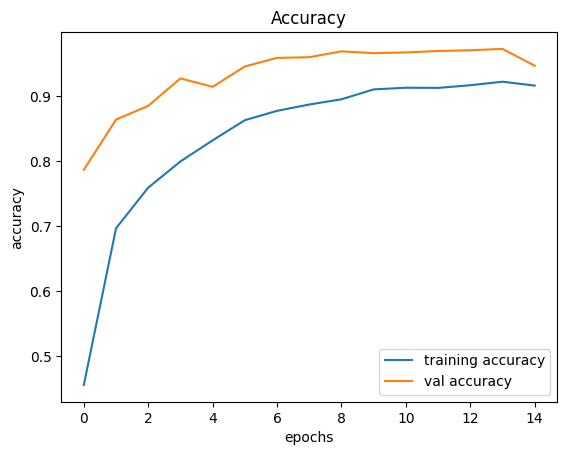

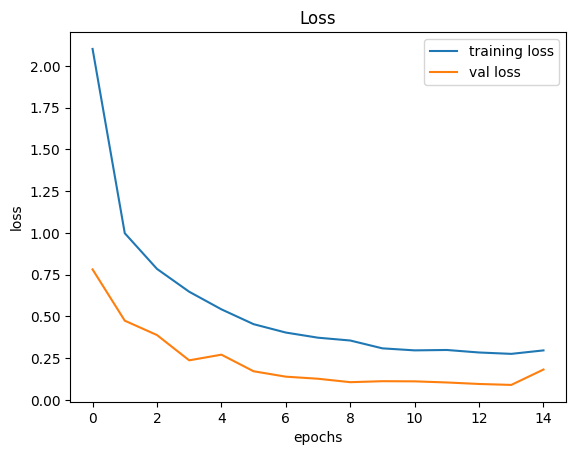

In [7]:

#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
history.history['val_loss']

[0.7816309332847595,
 0.4744408428668976,
 0.3883832097053528,
 0.23695635795593262,
 0.2708469033241272,
 0.17144449055194855,
 0.13908250629901886,
 0.12665607035160065,
 0.10606057941913605,
 0.11197259277105331,
 0.11098776012659073,
 0.10433803498744965,
 0.09534547477960587,
 0.08966290205717087,
 0.1818874329328537]

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [29]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('TrafficSign/DataSets/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    print(img)
    img = f"TrafficSign/{img}"
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    
X_test=np.array(data)
# pred = model.predict_classes(X_test)
pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

model.save('traffic_classifier.h5')

Test/00000.png
Test/00001.png
Test/00002.png
Test/00003.png
Test/00004.png
Test/00005.png
Test/00006.png
Test/00007.png
Test/00008.png
Test/00009.png
Test/00010.png
Test/00011.png
Test/00012.png
Test/00013.png
Test/00014.png
Test/00015.png
Test/00016.png
Test/00017.png
Test/00018.png
Test/00019.png
Test/00020.png
Test/00021.png
Test/00022.png
Test/00023.png
Test/00024.png
Test/00025.png
Test/00026.png
Test/00027.png
Test/00028.png
Test/00029.png
Test/00030.png
Test/00031.png
Test/00032.png
Test/00033.png
Test/00034.png
Test/00035.png
Test/00036.png
Test/00037.png
Test/00038.png
Test/00039.png
Test/00040.png
Test/00041.png
Test/00042.png
Test/00043.png
Test/00044.png
Test/00045.png
Test/00046.png
Test/00047.png
Test/00048.png
Test/00049.png
Test/00050.png
Test/00051.png
Test/00052.png
Test/00053.png
Test/00054.png
Test/00055.png
Test/00056.png
Test/00057.png
Test/00058.png
Test/00059.png
Test/00060.png
Test/00061.png
Test/00062.png
Test/00063.png
Test/00064.png
Test/00065.png
Test/00066

D:\Lambton College\Practicals\Sem 2\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

In [24]:
from keras.models import load_model
model = load_model('traffic_classifier.h5')

file_path = "TrafficSign/Meta/8.png"
image = Image.open(file_path)
image = image.resize((30,30))
image = np.expand_dims(image, axis=0)
image = np.array(image)
# pred = model.predict_classes([image])[0]
pred = model.predict(X_test)
# pred = np.argmax(pred, axis=-1)
#Accuracy with the test data


395/395 [==============================] - 9s 23ms/step


In [28]:
# sign = classes[pred]
# print(sign)
classes[np.argmax(pred[1], axis=-1)]
# classes[np.argmax(pred[0], axis=-1)]


'Speed limit (20km/h)'